# Airbnb Project 

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ab = pd.read_csv('Airbnb.csv')
ab.head(2)      # Head use for first two row data only

C:\Users\avesh\AppData\Local\Temp\ipykernel_24720\2662837995.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  ab = pd.read_csv('Airbnb.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [3]:
# Then use columns function for checking all column names in the dataset 

In [4]:
ab.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
# Then use shape function to check the total columns and total rows in a dataset

In [6]:
ab.shape

(102599, 26)

In [7]:
# This is used to check missing (null/NaN) values in each column of the DataFrames

In [8]:
ab.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [9]:
# This give a  quick overview of the DataFrame

In [10]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [11]:
# Changing datatype of last review column from object to datetime 
ab['last review'] = pd.to_datetime(ab['last review'],errors='coerce')

In [12]:
# Drop records with missing values
ab.dropna(subset=['NAME','host name'],inplace=True)

In [13]:
# Filling Missing Values 

ab.fillna({'reviews per month': 0,'last review':ab['last review'].min()},inplace=True)

In [14]:
ab.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [15]:
ab.shape

(101949, 26)

In [16]:
ab['price'].head(2)

0    $966 
1    $142 
Name: price, dtype: object

In [17]:
# Remove Dollar sign from Price Column and service fee 

ab['price'] = ab['price'].replace({'[\$,]':''},regex=True).astype('float')
ab['service fee'] = ab['service fee'].replace({'[\$,]':''},regex=True).astype('float')

In [18]:
ab['price'].head(2)

0    966.0
1    142.0
Name: price, dtype: float64

In [19]:
ab.isnull().sum()

id                                     0
NAME                                   0
host id                                0
host_identity_verified               276
host name                              0
neighbourhood group                   26
neighbourhood                         16
lat                                    8
long                                   8
country                              526
country code                         122
instant_bookable                      96
cancellation_policy                   70
room type                              0
Construction year                    200
price                                239
service fee                          268
minimum nights                       403
number of reviews                    182
last review                            0
reviews per month                      0
review rate number                   314
calculated host listings count       318
availability 365                     420
house_rules     

In [20]:
# Dropping column License and House_rules 

ab.drop(columns={'house_rules','license'},errors='coerce',inplace=True)

In [21]:
ab.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0


In [22]:
ab.shape

(101949, 24)

In [23]:
# Remove Duplicates
ab.drop_duplicates(inplace=True)

In [24]:
ab.shape

(101410, 24)

There are 539 duplicate values are deleted

In [25]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  country code                    101288 non-null  object      

In [26]:
ab.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,125.043998,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,68.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,183.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,66.313374,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


In [27]:
# Replacing incorrect or inconsistent values

In [28]:
ab['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [29]:
ab['neighbourhood group'] = ab['neighbourhood group'].replace({'manhatan':'Manhattan'})

In [30]:
ab['neighbourhood group'] = ab['neighbourhood group'].replace({'brookln':'Brooklyn'})

In [31]:
ab['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

# Visualization 

In [32]:
# Now, let's visualize the data to identify trends, distributions, and relationships between variables

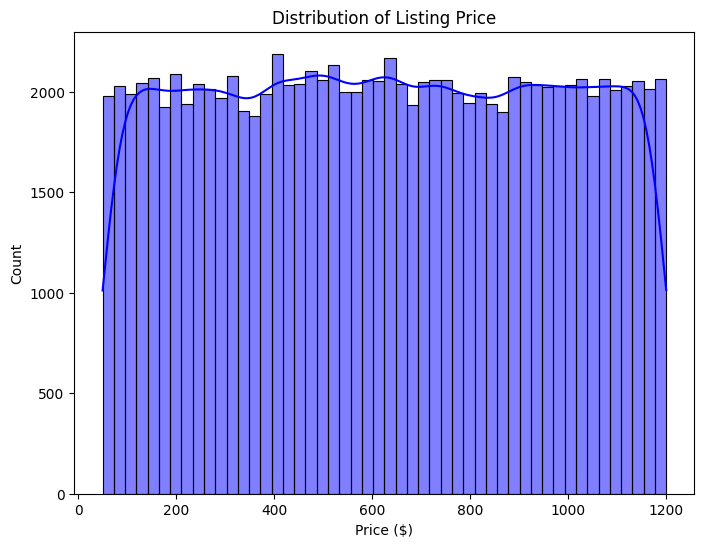

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(data=ab,x='price',bins=50,kde=True,color='blue')
plt.title('Distribution of Listing Price')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

The chart visualizes the distribution of listing prices up to $1200
with most prices evenly spread across the range. 
A blue KDE curve highlights the overall trend
showing minor fluctuations in frequency.

In [34]:
ab['room type']

0            Private room
1         Entire home/apt
2            Private room
4         Entire home/apt
5         Entire home/apt
               ...       
102053       Private room
102054       Private room
102055    Entire home/apt
102056       Private room
102057    Entire home/apt
Name: room type, Length: 101410, dtype: object

In [35]:
# Let's see how room types are distributed in the dataset.

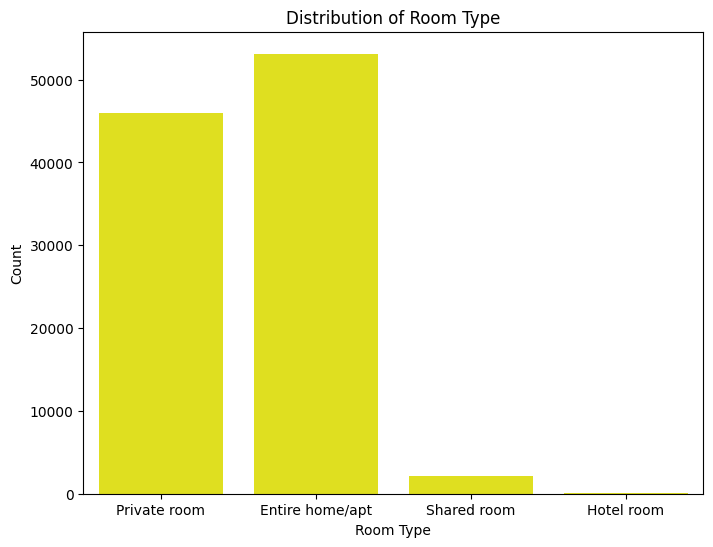

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(data=ab,x='room type',color='yellow')
plt.title('Distribution of Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

Entire home/apt is the most common, and Hotel room is the least.

In [37]:
# Let’s check which neighbourhood group has the most listings.

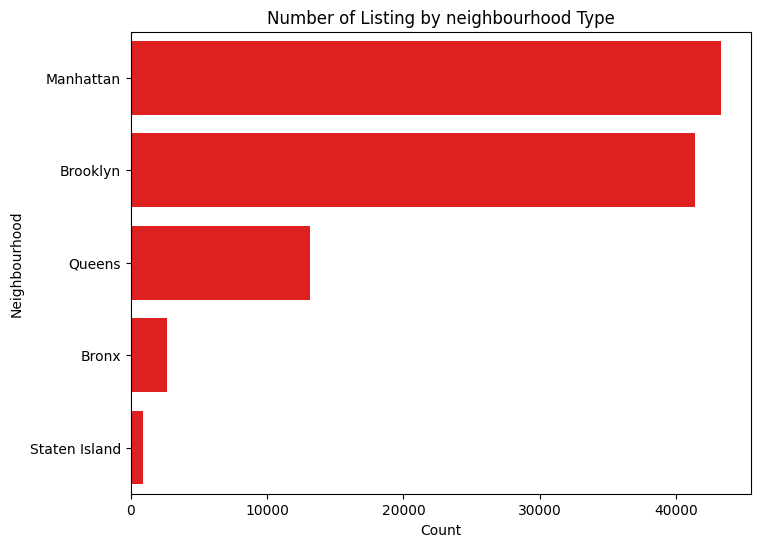

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(data=ab,y='neighbourhood group',color='Red',order =ab['neighbourhood group'].value_counts().index)
plt.title('Number of Listing by neighbourhood Type')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

Manhattan has the highest number of listings, followed by Brooklyn and the least is Staten Island

In [39]:
# Let’s see how price varies across different room types.

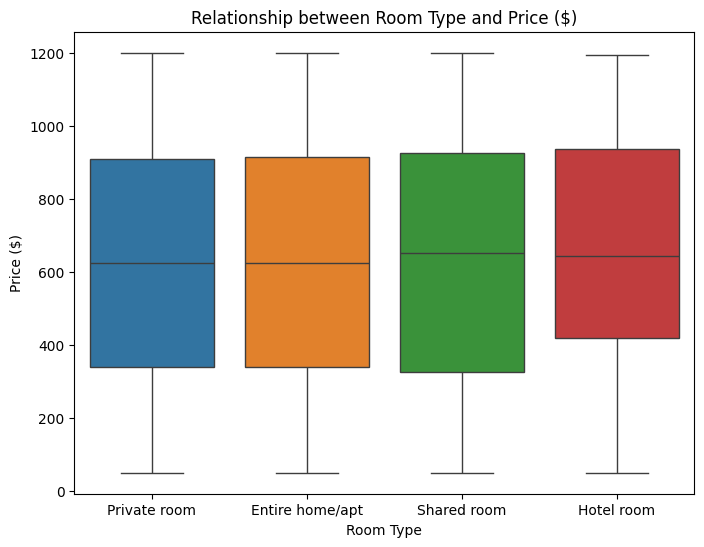

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(data=ab,x='room type',y='price',hue='room type')
plt.title('Relationship between Room Type and Price ($)')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

Entire home/apt has the highest median price, while shared rooms are the cheapest.

In [41]:
# Calculates the average price for each construction year.

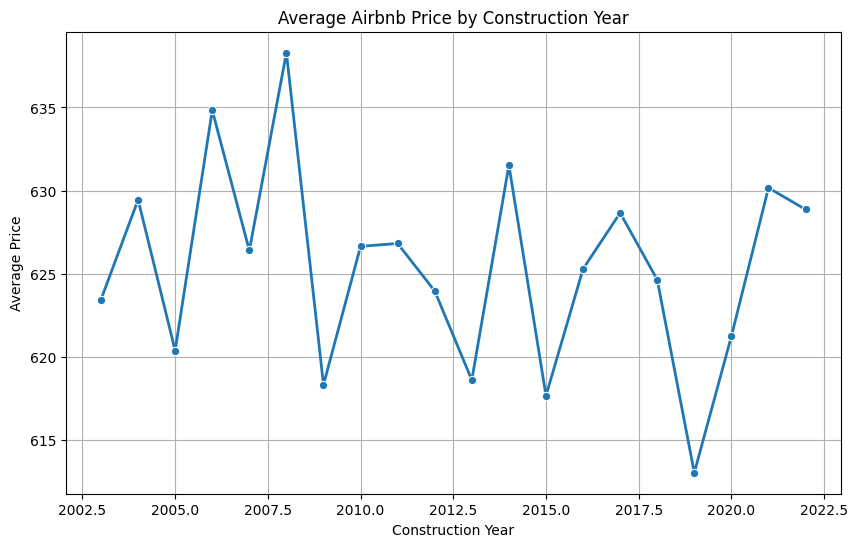

In [42]:
ab['Construction year'] = ab['Construction year'].astype('Int64')
yearly_price = ab.groupby('Construction year',as_index=False)['price'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_price, x='Construction year', y='price', marker='o', linewidth=2)
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title('Average Airbnb Price by Construction Year')
plt.grid(True)
plt.show()

The line chart reveals that 2009 has the highest average price, while 2019 has the lowest average price.

In [43]:
# Calculates the average price based on both 'host identity verified' and 'Neighbourhood group'.

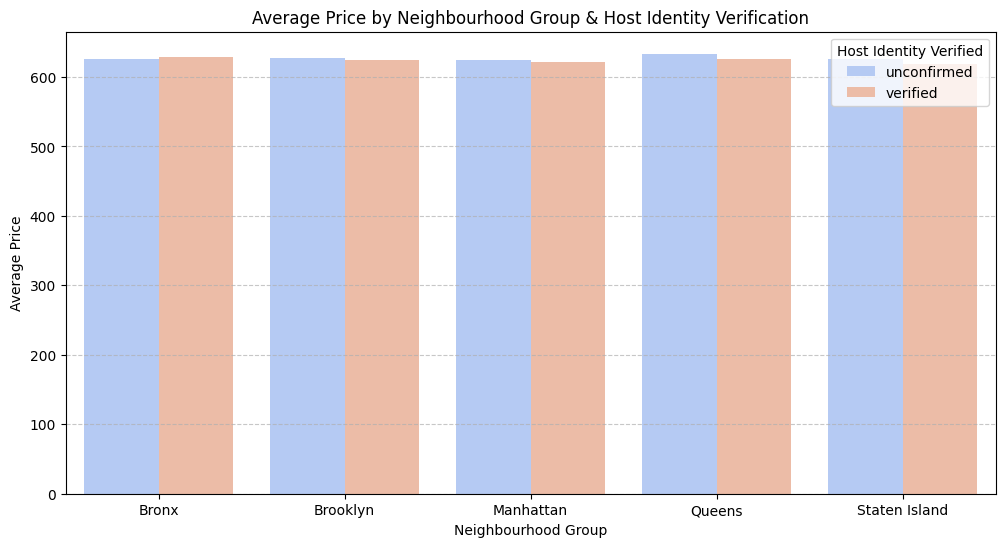

In [44]:
avg_price = ab.groupby(['host_identity_verified', 'neighbourhood group'], as_index=False)['price'].mean()
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x='neighbourhood group', y='price', hue='host_identity_verified', palette='coolwarm')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group & Host Identity Verification')
plt.legend(title='Host Identity Verified')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Queens and unconfirmed hosts have the highest average price, while Staten Island and verified hosts have the lowest

In [45]:
# Calculates the average price for each month.

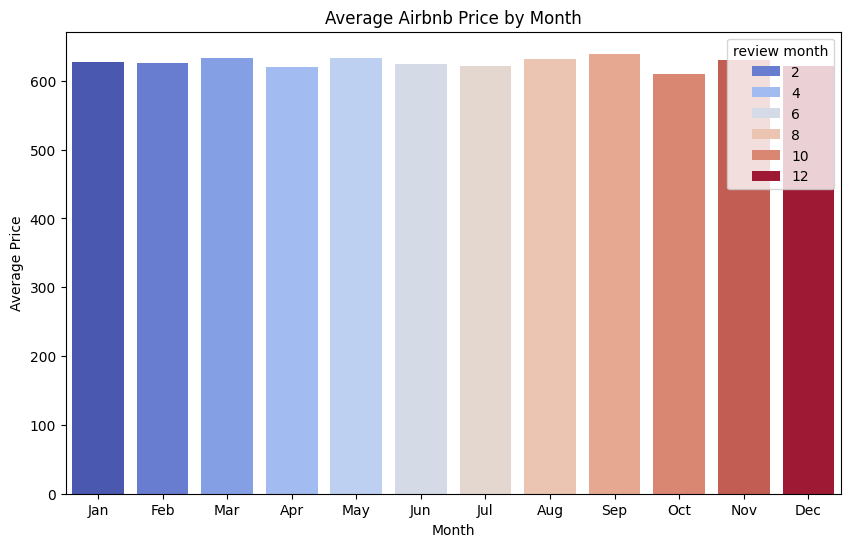

In [47]:
ab['last review'] = pd.to_datetime(ab['last review'], errors='coerce')
# Extract month from last review
ab['review month'] = ab['last review'].dt.month

# Group by month and calculate average price
monthly_prices = ab.groupby('review month', as_index=False)['price'].mean()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_prices, x='review month', y='price',hue='review month', palette='coolwarm')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Airbnb Price by Month')
plt.show()

The bar chart shows that September has the highest average price, while October has the lowest average price

Key Insights From Exploratory Data Analysis of AirBnB Dataset
1 . Pricing Distribution:
            Most Airbnb listings are priced within a moderate range.
            There are a few high-priced outliers, indicating some premium listings with significantly higher prices.
2. Room Type Distribution:
            The majority of listings are either entire homes/apartments or private rooms.
            Shared rooms and hotel rooms constitute a very small portion of the listings.
3. Geographical Distribution:
            Listings are predominantly concentrated in popular areas like Brooklyn and Manhattan.
            Other boroughs such as Queens, Bronx, and Staten Island have fewer listings.
4. Price Comparison by Room Type:
            Entire homes/apartments generally cost more than private rooms.
            Shared rooms tend to have the lowest prices among the room types.
5. Average Price by Construction Year:
           The analysis revealed that 2009 had the highest average price, 
           while 2019 had the lowest.
6. Average Price by Host Identity Verification and Neighbourhood Group:
            The results showed that "unconfirmed" hosts in Queens had the highest average price, 
            while "verified" hosts in Staten Island had the lowest average price.
7. Average Price by Month (Review Month):
            It was observed that September had the highest average price, 
            while October had the lowest.